<a href="https://colab.research.google.com/github/sap156/infinityskillshub/blob/main/Time_Series_and_Edge_Case_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI for Data Professionals
# Data Generation and Augmentation — Module 2 Part 3
# Time Series Data Generation and Edge Cases

# ⏰ Time Series and Edge Case Generation

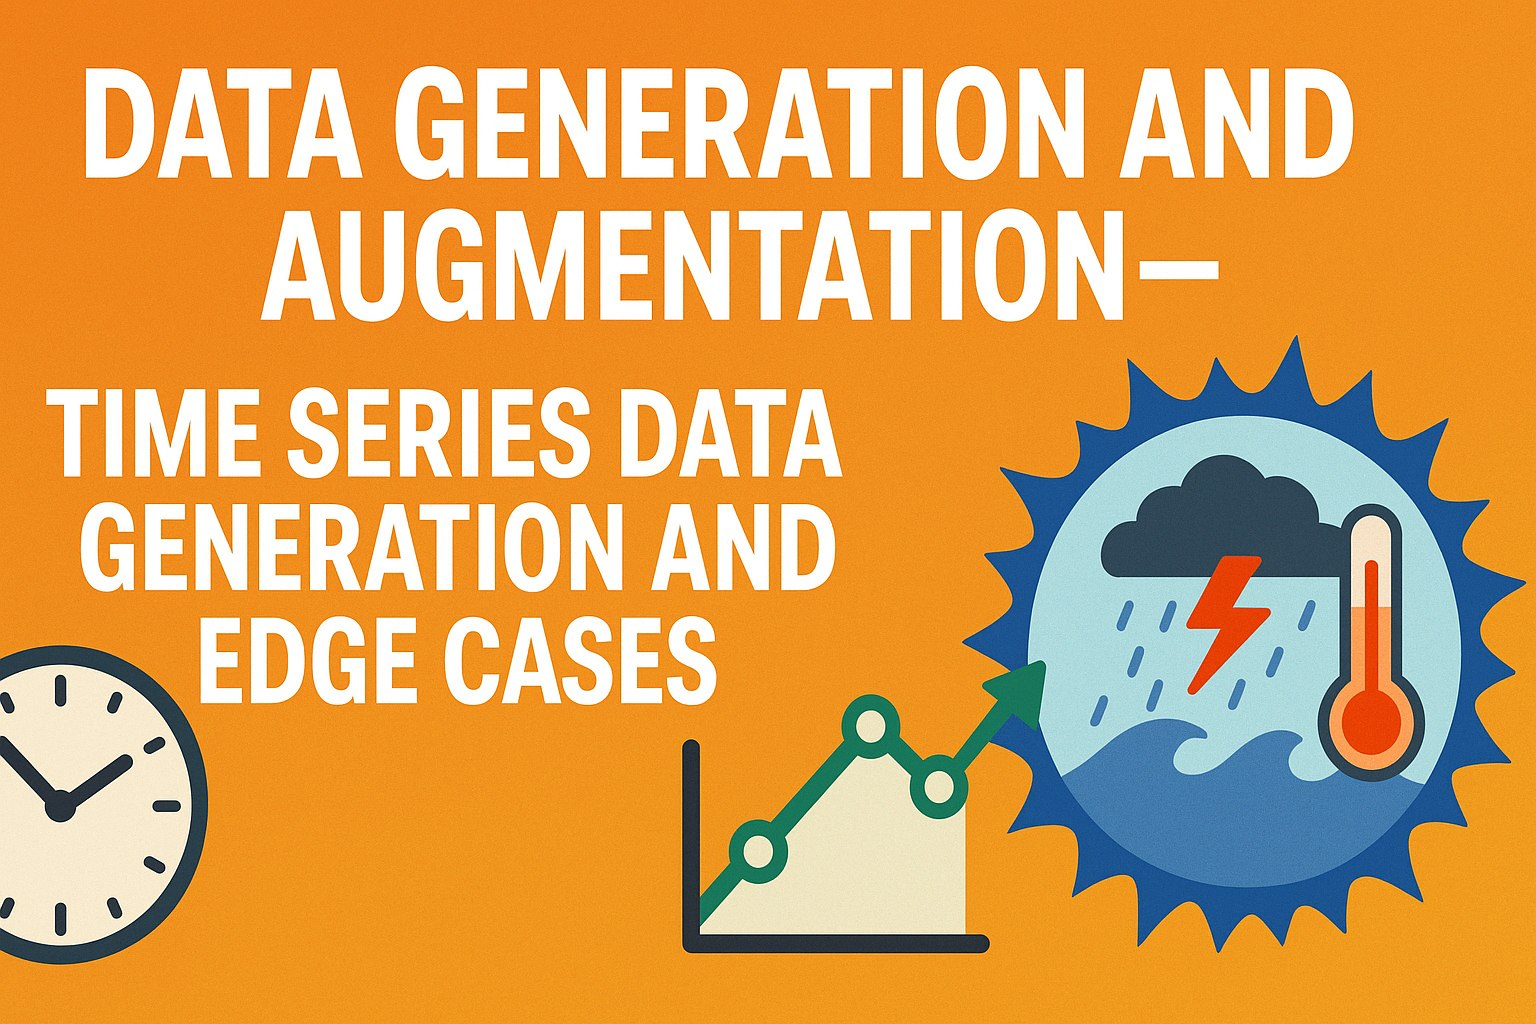

**This notebook demonstrates how Generative AI can generate realistic time series data
and edge cases for robust model training.**

Time series data plays a critical role in various industries, from finance to retail,
where historical trends inform future decisions. Additionally, handling edge cases is
essential for ensuring that machine learning models perform well under all conditions.

**Learning Objectives:**
- ✅ Generate realistic time series data with business patterns
- ✅ Create different trend scenarios for model training
- ✅ Understand traditional vs AI-powered edge case generation
- ✅ Enhance datasets with extreme but plausible scenarios

# =====================================================
# 🛠️ SETUP AND IMPORTS
# =====================================================

# GenAI for Time Series and Edge Case Generation
# Introduction
# --------------------------------------------------
# This notebook demonstrates how Generative AI can generate
# realistic time series data and edge cases for robust model training

In [ ]:
from openai import OpenAI
import pandas as pd
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from google.colab import userdata


api_key=userdata.get('OPENAI_API_KEY')

# Set up our AI client securely
client = OpenAI(api_key=api_key)

def clean(dict_variable):
    return next(iter(dict_variable.values()))

print("✅ Environment ready for time series generation!")

# =====================================================
# 📈 GENERATE TIME SERIES SALES DATA
# =====================================================


## Generating Realistic Restaurant Sales Data

Let's generate daily sales data for a restaurant that shows realistic business patterns
like weekend peaks. This is much more sophisticated than random data generation.


# --------------------------------------------------
# Generate Time Series Sales Data
# --------------------------------------------------

In [ ]:
prompt_ts = """
Generate synthetic daily sales data for a restaurant for over 4 weeks.
Include date and total_sales. Show a realistic pattern with weekend peaks.
Output in JSON form.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user",
          "content": prompt_ts
         }
        ],
    response_format={"type": "json_object"}
)

sales_data = json.loads(response.choices[0].message.content)
df_sales = pd.DataFrame(clean(sales_data))
df_sales['date'] = pd.to_datetime(df_sales['date'])

print("📊 Generated Sales Data:")
print(df_sales.head(10))
print(f"\nDataset size: {len(df_sales)} days")

In [ ]:
# Visualize Time Series
plt.figure(figsize=(10, 6))
plt.plot(df_sales['date'], df_sales['total_sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze weekend vs weekday patterns
df_sales['day_of_week'] = df_sales['date'].dt.day_name()
df_sales['is_weekend'] = df_sales['date'].dt.dayofweek >= 5

weekend_avg = df_sales[df_sales['is_weekend']]['total_sales'].mean()
weekday_avg = df_sales[~df_sales['is_weekend']]['total_sales'].mean()

print(f"\n📈 Pattern Analysis:")
print(f"- Average weekday sales: ${weekday_avg:.2f}")
print(f"- Average weekend sales: ${weekend_avg:.2f}")
print(f"- Weekend premium: {((weekend_avg/weekday_avg - 1) * 100):.1f}%")


🎯 **Key Insight:** The AI automatically created realistic weekend peaks without us
specifying exact percentages or patterns. This demonstrates business intelligence
that traditional random generation lacks.

# =====================================================
# 📉 GENERATE DIFFERENT TREND SCENARIOS
# =====================================================

"""
## Creating Different Business Scenarios

Real forecasting models need training data that represents various market conditions.
Let's generate a declining trend scenario to test model robustness.
"""

# --------------------------------------------------
# Generate Downward Trend Sales Data (Optional)
# --------------------------------------------------

In [ ]:
prompt_down = "Generate synthetic daily sales data for a restaurant for over 4 weeks, with an overall downward trend. Output in JSON form."

response_down = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user",
          "content": prompt_down
         }
        ],
    response_format={"type": "json_object"})

sales_data_down = json.loads(response_down.choices[0].message.content)
df_sales_down = pd.DataFrame(clean(sales_data_down))
df_sales_down['date'] = pd.to_datetime(df_sales_down['date'])

print("📉 Generated Declining Sales Data:")
print(df_sales_down.head(10))

🎯 **Business Value:** Having multiple trend scenarios allows you to train forecasting
models that work in both growth and decline situations, making them more robust for
real-world deployment.

# =====================================================
# 🌡️ TRADITIONAL VS AI EDGE CASE GENERATION
# =====================================================

"""
## Traditional Statistical Approach vs AI Edge Cases

Let's compare traditional random data generation with AI-powered edge case creation
to see the difference in quality and realism.
"""

# --------------------------------------------------
# Generate Standard Weather Dataset (Manual)
# --------------------------------------------------


In [ ]:

weather_data = pd.DataFrame({
    'date': pd.date_range(start='2025-02-04', periods=100),
    'temperature': np.random.uniform(0, 30, 100),
    'precipitation': np.random.uniform(0, 50, 100),
    'wind_speed': np.random.uniform(0, 20, 100)
})

print("📊 Traditional Random Weather Dataset:")
print(weather_data.head())

print(f"\nTraditional Data Ranges:")
print(f"- Temperature: {weather_data['temperature'].min():.2f}°C to {weather_data['temperature'].max():.2f}°C")
print(f"- Precipitation: {weather_data['precipitation'].min():.2f}mm to {weather_data['precipitation'].max():.2f}mm")
print(f"- Wind Speed: {weather_data['wind_speed'].min():.2f}m/s to {weather_data['wind_speed'].max():.2f}m/s")


In [ ]:
import matplotlib.pyplot as plt

# Add edge cases to the weather dataset
for case in clean(edge_cases):
    new_row = {
        'date': pd.Timestamp.now(),
        'temperature': case['temperature'],
        'precipitation': case['precipitation'],
        'wind_speed': case['wind_speed']
    }
    new_row_df = pd.DataFrame([new_row])
    weather_data = pd.concat([weather_data, new_row_df], ignore_index=True)

print(weather_data.tail())
print(f"\nUpdated temperature range: {weather_data['temperature'].min():.2f} to {weather_data['temperature'].max():.2f}")
print(f"Updated precipitation range: {weather_data['precipitation'].min():.2f} to {weather_data['precipitation'].max():.2f}")
print(f"Updated wind speed range: {weather_data['wind_speed'].min():.2f} to {weather_data['wind_speed'].max():.2f}")

# =====================================================
# 🌪️ AI-POWERED EDGE CASE GENERATION
# =====================================================

"""
## Creating Realistic Edge Cases with AI

Now let's use AI to generate extreme but scientifically plausible weather scenarios
that can break or stress-test our models.
"""

# --------------------------------------------------
# Generate Edge Cases with GenAI
# --------------------------------------------------


In [ ]:
prompt_edge = """
Generate 5 edge cases for a weather dataset with description,
temperature (C), precipitation (mm), and wind speed (m/s).
Include extreme but plausible values. Output in JSON form"""

response_edge = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user",
          "content": prompt_edge
         }
        ],
         response_format={"type": "json_object"}
)

edge_cases = json.loads(response_edge.choices[0].message.content)

print("🌪️ AI-Generated Edge Cases:\n")
pprint(edge_cases)

In [ ]:
# --------------------------
# 🧪 Line Graph Visualization
# --------------------------

# Convert to DataFrame
df_edge = pd.DataFrame(clean(edge_cases))

# Assign index as event number
df_edge.index = [f"Case {i+1}" for i in range(len(df_edge))]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_edge.index, df_edge['temperature'], marker='o', label='Temperature (°C)', color='red')
plt.plot(df_edge.index, df_edge['precipitation'], marker='s', label='Precipitation (mm)', color='blue')
plt.plot(df_edge.index, df_edge['wind_speed'], marker='^', label='Wind Speed (m/s)', color='green')

plt.title('AI-Generated Weather Edge Cases')
plt.xlabel('Edge Case')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🎯 **Key Advantages of AI Edge Cases:**

1. **Scientific Plausibility:** AI understands that extreme cold often comes with specific
   weather patterns, not just random extreme values.

2. **Contextual Combinations:** Real extreme weather events have correlated variables
   (e.g., hurricanes = high wind + high precipitation + moderate temperature).

3. **Descriptive Context:** Each edge case comes with a description explaining the
   scenario, making it easier to understand and validate.

4. **Realistic Ranges:** AI generates extreme values that are scientifically possible,
   not just mathematical outliers.

**Why This Matters:**
- Traditional random edge cases might generate impossible combinations (e.g., -50°C with 200mm rain)
- AI edge cases test your models with realistic extreme scenarios they might actually encounter
- Better edge case testing leads to more robust, production-ready models

**💡 Best Practices:**

1. **Be Specific in Prompts:** "Weekend peaks" is much better than "realistic patterns"
2. **Generate Multiple Scenarios:** Train models on various conditions (growth, decline, volatility)
3. **Combine Traditional + AI:** Use AI edge cases to enhance traditional datasets
4. **Validate Plausibility:** Check that extreme values make scientific/business sense
5. **Document Edge Cases:** AI-provided descriptions help explain unusual data points

**🚀 Immediate Applications:**

- **Forecasting Models:** Train on diverse scenarios for robust predictions
- **System Testing:** Validate monitoring systems with extreme conditions  
- **Risk Assessment:** Model various market conditions for planning
- **Model Validation:** Ensure algorithms work across multiple scenarios